PRUEBAS ADICIONALES DE VALIDACIÓN DEL ENTORNO DE DESARROLLO

In [1]:
# ============================================
# PRUEBA 1: Manipulación de Datos (Necesaria para pruebas posteriores)
# ============================================
import numpy as np
import pandas as pd

np.random.seed(42)
data = {
    'edad': np.random.randint(18, 80, 1000),
    'nivel_educativo': np.random.randint(1, 6, 1000),
    'ingreso_mensual': np.random.randint(1000, 15000, 1000),
    'ubicacion': np.random.choice(['Urbano', 'Rural'], 1000)
}

df = pd.DataFrame(data)
print("=" * 60)
print("PRUEBA 1: MANIPULACIÓN DE DATOS")
print("=" * 60)
print(df.head())
print(f"\nDataset: {df.shape[0]} votantes, {df.shape[1]} características")
print(f"\nTipos de datos:\n{df.dtypes}")
print("✓ Prueba 1 completada exitosamente\n")


PRUEBA 1: MANIPULACIÓN DE DATOS
   edad  nivel_educativo  ingreso_mensual ubicacion
0    56                3             8867     Rural
1    69                5            14161     Rural
2    46                2             5109     Rural
3    32                1            14258    Urbano
4    60                3             8179     Rural

Dataset: 1000 votantes, 4 características

Tipos de datos:
edad                int32
nivel_educativo     int32
ingreso_mensual     int32
ubicacion          object
dtype: object
✓ Prueba 1 completada exitosamente



In [2]:
# ============================================
# PRUEBA 2: Preprocesamiento - Normalización (Necesaria para pruebas posteriores)
# ============================================
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['edad', 'nivel_educativo', 'ingreso_mensual']
scaler = MinMaxScaler()

df_normalized = df.copy()
df_normalized[numeric_features] = scaler.fit_transform(df[numeric_features])

print("=" * 60)
print("PRUEBA 2: NORMALIZACIÓN DE DATOS")
print("=" * 60)
print("Datos originales (primeras 3 filas):")
print(df[numeric_features].head(3))
print("\nDatos normalizados (primeras 3 filas):")
print(df_normalized[numeric_features].head(3))
print(f"\nRango verificado: [{df_normalized[numeric_features].min().min():.2f}, {df_normalized[numeric_features].max().max():.2f}]")
print("✓ Prueba 2 completada exitosamente\n")

PRUEBA 2: NORMALIZACIÓN DE DATOS
Datos originales (primeras 3 filas):
   edad  nivel_educativo  ingreso_mensual
0    56                3             8867
1    69                5            14161
2    46                2             5109

Datos normalizados (primeras 3 filas):
       edad  nivel_educativo  ingreso_mensual
0  0.622951             0.50         0.562138
1  0.836066             1.00         0.940470
2  0.459016             0.25         0.293575

Rango verificado: [0.00, 1.00]
✓ Prueba 2 completada exitosamente



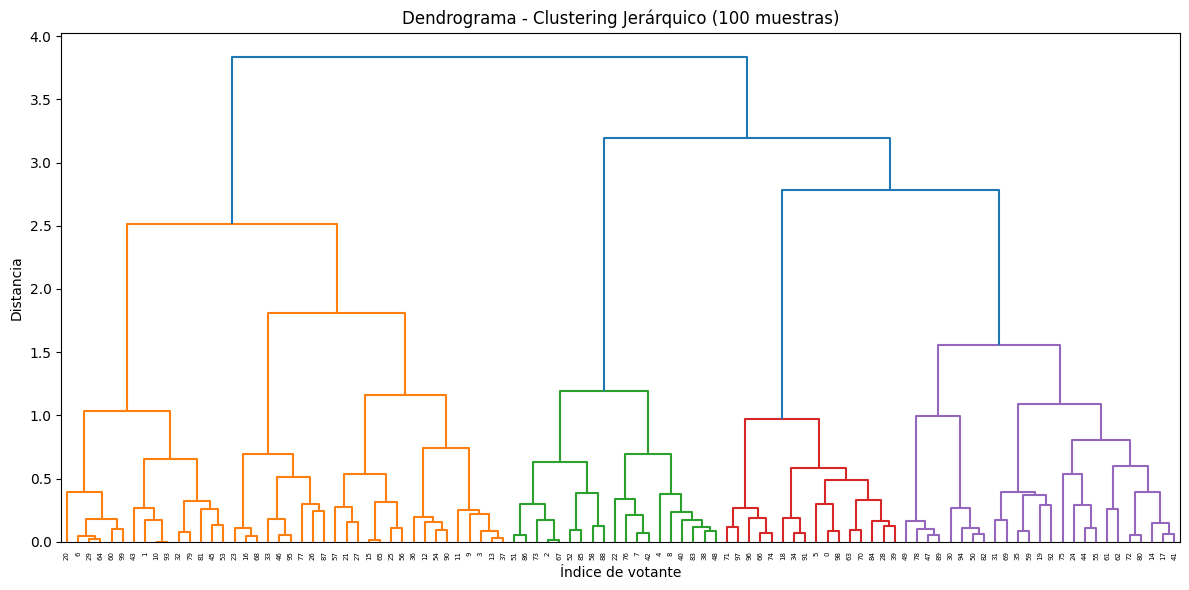

✓ Prueba 6 completada exitosamente



In [3]:
# ============================================
# PRUEBA 6: Clustering - Jerarquico
# ============================================
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcular matriz de enlaces
Z = linkage(df_normalized[numeric_features].sample(100, random_state=42), 
            method='ward')

# Generar dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrograma - Clustering Jerárquico (100 muestras)')
plt.xlabel('Índice de votante')
plt.ylabel('Distancia')
plt.tight_layout()
plt.savefig('test_dendrograma.png')
plt.show()
print("✓ Prueba 6 completada exitosamente\n")

In [4]:
# ============================================
# PRUEBA 7: Clustering - DBSCAN
# ============================================
from sklearn.cluster import DBSCAN

# Ajustar parámetros para datos normalizados
dbscan = DBSCAN(eps=0.15, min_samples=5)  # eps más pequeño, min_samples menor
clusters_dbscan = dbscan.fit_predict(df_normalized[numeric_features])

print(f"Clusters identificados: {np.unique(clusters_dbscan)}")
print(f"\nDistribución (cluster -1 = ruido):")
print(pd.Series(clusters_dbscan).value_counts().sort_index())
print(f"\nNúmero de puntos de ruido: {(clusters_dbscan == -1).sum()}")
print(f"Número total de clusters (sin contar ruido): {len(np.unique(clusters_dbscan[clusters_dbscan != -1]))}")
print("✓ Prueba 7 completada exitosamente\n")

Clusters identificados: [-1  0  1  2  3  4]

Distribución (cluster -1 = ruido):
-1      2
 0    208
 1    202
 2    204
 3    211
 4    173
Name: count, dtype: int64

Número de puntos de ruido: 2
Número total de clusters (sin contar ruido): 5
✓ Prueba 7 completada exitosamente



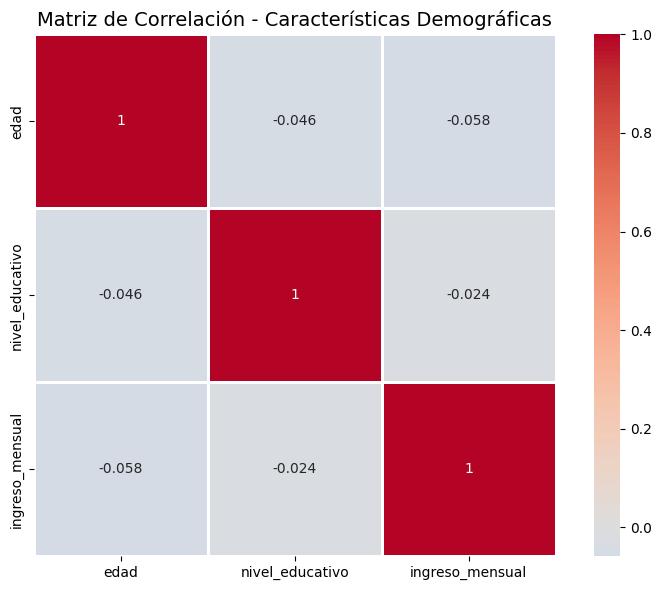

Heatmap generado: test_heatmap.png
✓ Prueba 9 completada exitosamente



In [ ]:
# ============================================
# PRUEBA 8: Visualización adicional
# ============================================
corr_matrix = df[numeric_features].corr()

# Visualizar con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación - Características Demográficas', fontsize=14)
plt.tight_layout()
plt.savefig('test_heatmap.png', dpi=150)
plt.show()

print("Heatmap generado: test_heatmap.png")
print("✓ Prueba 8 completada exitosamente\n")

PRUEBA CON CARGA DEL DATASET (Descargar de la fuente proporcionada)

In [ ]:
# ============================================
# PRUEBA 9: VERIFICACION DE CARGA DEL DATASET LAPOP BOLIVIA 2023
# ============================================
import pandas as pd

print("=" * 60)
print("PRUEBA 9: VERIFICACIÓN DATASET LAPOP BOLIVIA 2023")
print("=" * 60)

# --- CARGA ---
file_path = "../../data/raw/lapop_bolivia_2023.dta"

try:
    df = pd.read_stata(file_path, convert_categoricals=False)
    print(f"\n✓ Dataset cargado: {df.shape[0]} registros × {df.shape[1]} variables\n")
except FileNotFoundError:
    print(f"\n✗ Archivo no encontrado: {file_path}")
    exit()

# --- VERIFICAR VARIABLES DE ALTA PRIORIDAD ---
print("-" * 60)
print("VARIABLES DE ALTA PRIORIDAD:")
print("-" * 60)

variables_alta_prioridad = {
    'q2': 'Edad',
    'edre': 'Nivel educativo',
    'q10inc': 'Ingreso familiar',
    'etid': 'Identidad étnica',
    'boletidnew': 'Pertenencia indígena',
    'boletidnewb': 'Pueblo indígena específico',
    'prov': 'Departamento',
    'ur': 'Urbano/Rural',
    'ocupoit': 'Ocupación'
}

for codigo, nombre in variables_alta_prioridad.items():
    if codigo in df.columns:
        validos = df[codigo].notna().sum()
        pct = (validos / len(df)) * 100
        print(f"✓ {codigo:15} {nombre:30} ({validos:4}/{len(df)} = {pct:5.1f}%)")
    else:
        print(f"✗ {codigo:15} {nombre:30} [NO ENCONTRADA]")

# --- PRIMERAS 5 FILAS DEL DATASET ---
print("\n" + "-" * 60)
print("PRIMERAS 5 FILAS DEL DATASET:")
print("-" * 60)
print(df.head(5))

print("\n" + "=" * 60)

PRUEBA 10: VERIFICACIÓN DATASET LAPOP BOLIVIA 2023

✓ Dataset cargado: 1706 registros × 208 variables

------------------------------------------------------------
VARIABLES DE ALTA PRIORIDAD:
------------------------------------------------------------
✓ q2              Edad                           (1706/1706 = 100.0%)
✓ edre            Nivel educativo                (1701/1706 =  99.7%)
✓ q10inc          Ingreso familiar               (1507/1706 =  88.3%)
✓ etid            Identidad étnica               (1517/1706 =  88.9%)
✓ boletidnew      Pertenencia indígena           (1652/1706 =  96.8%)
✓ boletidnewb     Pueblo indígena específico     ( 856/1706 =  50.2%)
✓ prov            Departamento                   (1706/1706 = 100.0%)
✓ ur              Urbano/Rural                   (1706/1706 = 100.0%)
✓ ocupoit         Ocupación                      ( 966/1706 =  56.6%)

------------------------------------------------------------
PRIMERAS 5 FILAS DEL DATASET:
------------------------